# Annotating the data

Created: **19/07/18**  
Last modified: **30/07/18**

**Goal:** enrich the raw data `all_IMPACT_mutations_180508.txt` by adding some features to the filtered dataset obtained at the end of `first_analysis.ipynb [Pierre]`.  
This notebook is divided in three parts:
* **1. `Kaviar_AF` and `cosmic_count`**: get the `KAVIAR_AF` and `cosmic_count` features, basic study of the features
* **2. OncoKB annotations**: get the `oncogenicity` and `mutation_effect` features
* **3. Resume of the operations needed to get the additional features**

The process to add some features from `another_dataframe` will always be the same and each section will be divided in the following subsections:
1. Get the raw dataframe `another_dataframe`
2. Create keys to join the dataframe `impact` and `another_dataframe`
3. Process the new features (parse, change format, shape...)

**Refs:**
* [annation.ipynb [Dominik]](
https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180515_dominik/annotation.ipynb)
* [parseCosmic.R [Dominik]](
https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180515_dominik/parseCosmic.R)
* `first_analysis.ipynb` [Pierre]
* `custom_tools.R` [Pierre]

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kaviar_AF-and-cosmic_count" data-toc-modified-id="Kaviar_AF-and-cosmic_count-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><code>Kaviar_AF</code> and <code>cosmic_count</code></a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Kaviar_AF" data-toc-modified-id="Kaviar_AF-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>Kaviar_AF</code></a></span></li><li><span><a href="#cosmic70" data-toc-modified-id="cosmic70-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><code>cosmic70</code></a></span></li></ul></li><li><span><a href="#OncoKB-annotations" data-toc-modified-id="OncoKB-annotations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OncoKB annotations</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#is_a_hotspot" data-toc-modified-id="is_a_hotspot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>is_a_hotspot</code></a></span></li><li><span><a href="#is_a_3d_hotspot" data-toc-modified-id="is_a_3d_hotspot-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><code>is_a_3d_hotspot</code></a></span></li><li><span><a href="#oncogenic" data-toc-modified-id="oncogenic-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><code>oncogenic</code></a></span></li><li><span><a href="#Before" data-toc-modified-id="Before-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Before</a></span></li></ul></li><li><span><a href="#CancerGenesList" data-toc-modified-id="CancerGenesList-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CancerGenesList</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#gene_type" data-toc-modified-id="gene_type-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><code>gene_type</code></a></span></li></ul></li><li><span><a href="#Resume-of-the-operations-needed-to-get-the-additional-features" data-toc-modified-id="Resume-of-the-operations-needed-to-get-the-additional-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Resume of the operations needed to get the additional features</a></span></li></ul></div>

***

In [58]:
source("custom_tools.R") # custom tools functions made on purpose
setup_environment()

In [30]:
impact <- get_cleaned_impact()

## `Kaviar_AF` and `cosmic_count`

Get the `Kaviar_AF` and `cosmic_count` features from `all_IMPACT_mutations_180508.simple.hg19_multianno.txt` (impact annotated by Dominik).

### Get the raw data

In [60]:
impact_annotated <- read.table("data/all_IMPACT_mutations_180508.simple.hg19_multianno.txt",
                               sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [61]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 44

[1] 588547

Chr,Start,End,Ref,Alt,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,⋯,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,X1000g2015aug_all,Kaviar_AF,Kaviar_AC,Kaviar_AN,cosmic70
1,16265908,16265908,A,T,0.0,D,0.999,D,0.982,⋯,1.062,1.199,1.000,1.000,12.000,.,.,.,.,.
2,29543736,29543736,A,G,0.539,T,0.0,B,0.0,⋯,-0.056,0.117,0.186,0.336,6.380,0.0159744,0.0300125,4640,154602,ID=COSM3758202;OCCURENCE=1(large_intestine)
2,242793433,242793433,G,A,0.019,D,0.816,P,0.261,⋯,0.868,0.782,0.013,0.002,7.501,0.136781,0.0760792,11762,154602,.
5,56177843,56177843,C,G,0.002,D,0.102,B,0.078,⋯,0.871,0.935,0.982,0.984,13.098,0.00738818,0.0141072,2181,154602,.
5,180030313,180030313,C,A,0.65,T,0.0,B,0.001,⋯,0.021,-1.521,0.004,0.001,2.012,.,0.0789964,12213,154602,.
5,180051003,180051003,T,C,0.225,T,0.029,B,0.015,⋯,0.079,0.888,0.897,0.281,5.808,0.0529153,0.0911566,14093,154602,.


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a unique key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `Chr`\_`Start`\_`Red`_`Alt` for `impact_annotated`

In [62]:
# create the impact_annotated join_key
impact_annotated$join_key <- paste(impact_annotated$Chr,
                                   impact_annotated$Start,
                                   impact_annotated$Ref,
                                   impact_annotated$Alt,
                                   sep = '_')

In [63]:
# The features `Kaviar_AF` and `cosmic70` are unique for each `join_key`
nrow(impact_annotated %>% group_by(join_key) %>% filter(length(unique(Kaviar_AF)) > 1 |
                                                        length(unique(cosmic70)) > 1))
impact_annotated <- unique(impact_annotated[, c("join_key", "Kaviar_AF", "cosmic70")])
head(impact_annotated, 4)

[1] 0

join_key,Kaviar_AF,cosmic70
1_16265908_A_T,.,.
2_29543736_A_G,0.0300125,ID=COSM3758202;OCCURENCE=1(large_intestine)
2_242793433_G_A,0.0760792,.
5_56177843_C_G,0.0141072,.


In [64]:
# Every impact mut_key has a join_key analoguous in impact_annotated
nrow(impact[! impact$mut_key %in% impact_annotated$join_key,])

[1] 0

In [65]:
impact[, c("Kaviar_AF", "cosmic70")] <- left_join(impact,
                                                  impact_annotated,
                                                  by = c("mut_key" = "join_key"))[, c("Kaviar_AF", "cosmic70")]

### `Kaviar_AF`

We assume every value `'.'` of the `Kaviar_AF` feature is 0 (ie `'0'`). We convert every `Kaviar_AF` string to a double, to obtain the final feature.

In [66]:
head(unique(impact$Kaviar_AF))
impact$Kaviar_AF[(impact$Kaviar_AF == '.')] <- list('0')
impact$Kaviar_AF <- sapply(impact$Kaviar_AF, function(s) as.double(s))
head(unique(impact$Kaviar_AF))

[1] "."         "6.5e-06"   "1.29e-05"  "5.17e-05"  "1.94e-05"  "0.0006404"

[1] 0.0000000 0.0000065 0.0000129 0.0000517 0.0000194 0.0006404

(warning, sqrt x and y scale)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000000 0.0002682 0.0000065 0.3192330 

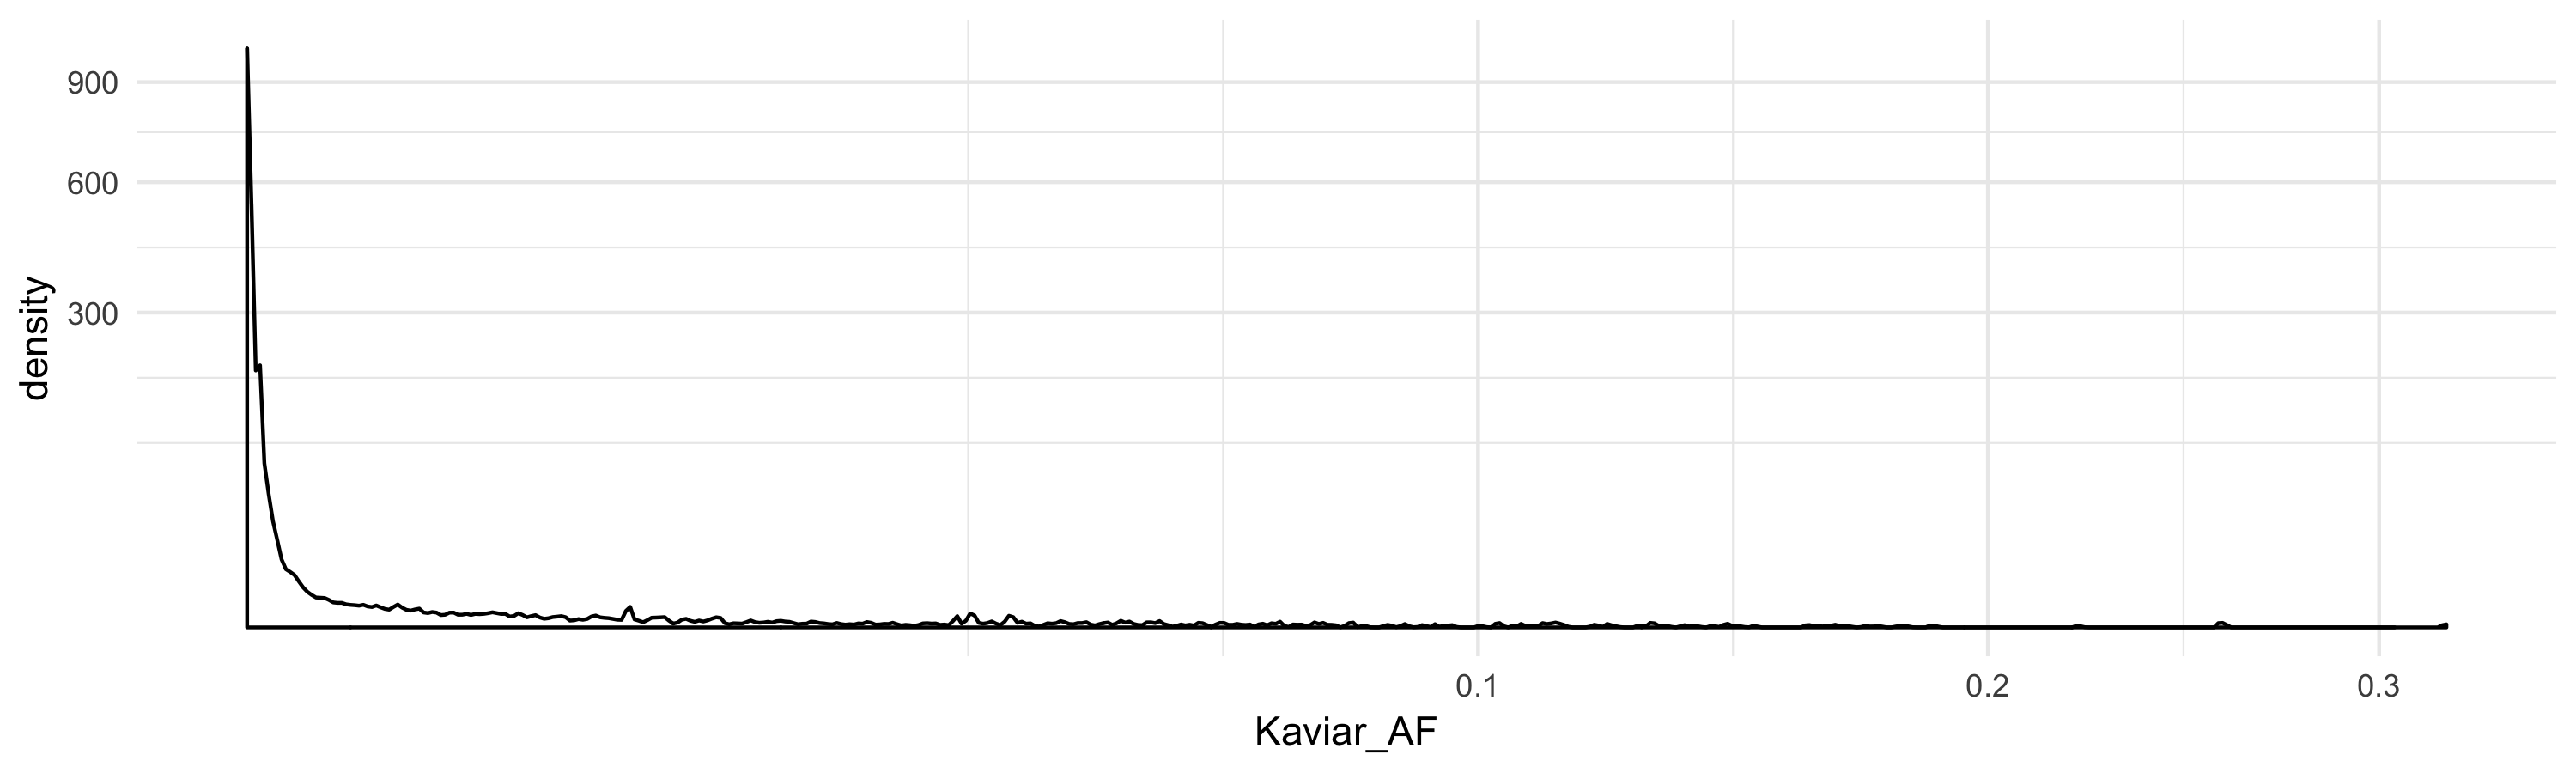

In [67]:
summary(impact$Kaviar_AF)
notebook_plot_size(10, 3)
ggplot(impact) + geom_density(aes(Kaviar_AF)) + scale_x_sqrt() + scale_y_sqrt()

### `cosmic70`

We assume every value `'.'` of the `cosmic70` feature means an occurence of 0 (ie `'OCCURENCE=0'`):

In [68]:
head(unique(impact$cosmic70), 5)
impact$cosmic70[(impact$cosmic70 == '.')] <- list('OCCURENCE=0')
head(unique(impact$cosmic70), 5)

[1] "ID=COSM45830;OCCURENCE=1(ovary)"                                                                                                           
[2] "."                                                                                                                                         
[3] "ID=COSM3782300,COSM3782297,COSM3782296,COSM3782298,COSM3782301,COSM3782299;OCCURENCE=1(pancreas)"                                          
[4] "ID=COSM3693022;OCCURENCE=1(large_intestine)"                                                                                               
[5] "ID=COSM5666;OCCURENCE=5(stomach),10(central_nervous_system),1(ovary),1(soft_tissue),2(endometrium),1(breast),4(skin),10(liver),3(pancreas)"

[[1]]
[1] "ID=COSM45830;OCCURENCE=1(ovary)"

[[2]]
[1] "OCCURENCE=0"

[[3]]
[1] "ID=COSM3782300,COSM3782297,COSM3782296,COSM3782298,COSM3782301,COSM3782299;OCCURENCE=1(pancreas)"

[[4]]
[1] "ID=COSM3693022;OCCURENCE=1(large_intestine)"

[[5]]
[1] "ID=COSM5666;OCCURENCE=5(stomach),10(central_nervous_system),1(ovary),1(soft_tissue),2(endometrium),1(breast),4(skin),10(liver),3(pancreas)"

The following function, `get_cosmic_count()` returns the sum of the occurence found in the cosmic string, ie the cosmic count. The cells after shows an exemple explaining how it works.

In [69]:
get_cosmic_count <- function(cosmic_string) {
    cosmic_string <- strsplit(cosmic_string, "OCCURENCE=")[[1]][2]
    cosmic_string <- strsplit(cosmic_string, ',')[[1]]
    cosmic_string <- sapply(cosmic_string, function(element) as.integer(strsplit(element, '\\(')[[1]][1]))
                
    return (sum(cosmic_string))
}

In [70]:
print(get_cosmic_count("ID=COSM3693022;OCCURENCE=1(large_intestine)"))
print(get_cosmic_count("ID=;OCCURENCE=0"))
print(get_cosmic_count("ID=COSM5219;OCCURENCE=3(lung),5(central_nervous_system),3(ovary),96(endometrium)"))

[1] 1
[1] 0
[1] 107


In [71]:
cosmic_string <- "ID=COSM5219;OCCURENCE=3(lung),5(central_nervous_system),3(ovary),96(endometrium)"

print("######## STEP 1 ########")
print(cosmic_string <- strsplit(cosmic_string, "OCCURENCE=")[[1]][2])

print("######## STEP 2 ########")
print(cosmic_string <- strsplit(cosmic_string, ',')[[1]])

print("######## STEP 3 ########")
print(cosmic_string <- sapply(cosmic_string, function(element) as.integer(strsplit(element, '\\(')[[1]][1])))
                  
sum(cosmic_string)

[1] "######## STEP 1 ########"
[1] "3(lung),5(central_nervous_system),3(ovary),96(endometrium)"
[1] "######## STEP 2 ########"
[1] "3(lung)"                   "5(central_nervous_system)"
[3] "3(ovary)"                  "96(endometrium)"          
[1] "######## STEP 3 ########"
                  3(lung) 5(central_nervous_system)                  3(ovary) 
                        3                         5                         3 
          96(endometrium) 
                       96 


[1] 107

We convert every `cosmic70` string to a integer, the cosmic count given by the `get_cosmic_count()`, and replace the `cosmic70` feature by the `cosmic_count` feature.

In [72]:
impact$cosmic_count <- sapply(impact$cosmic70, get_cosmic_count)
impact$cosmic70 <- NULL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   171.5     0.0 33328.0 

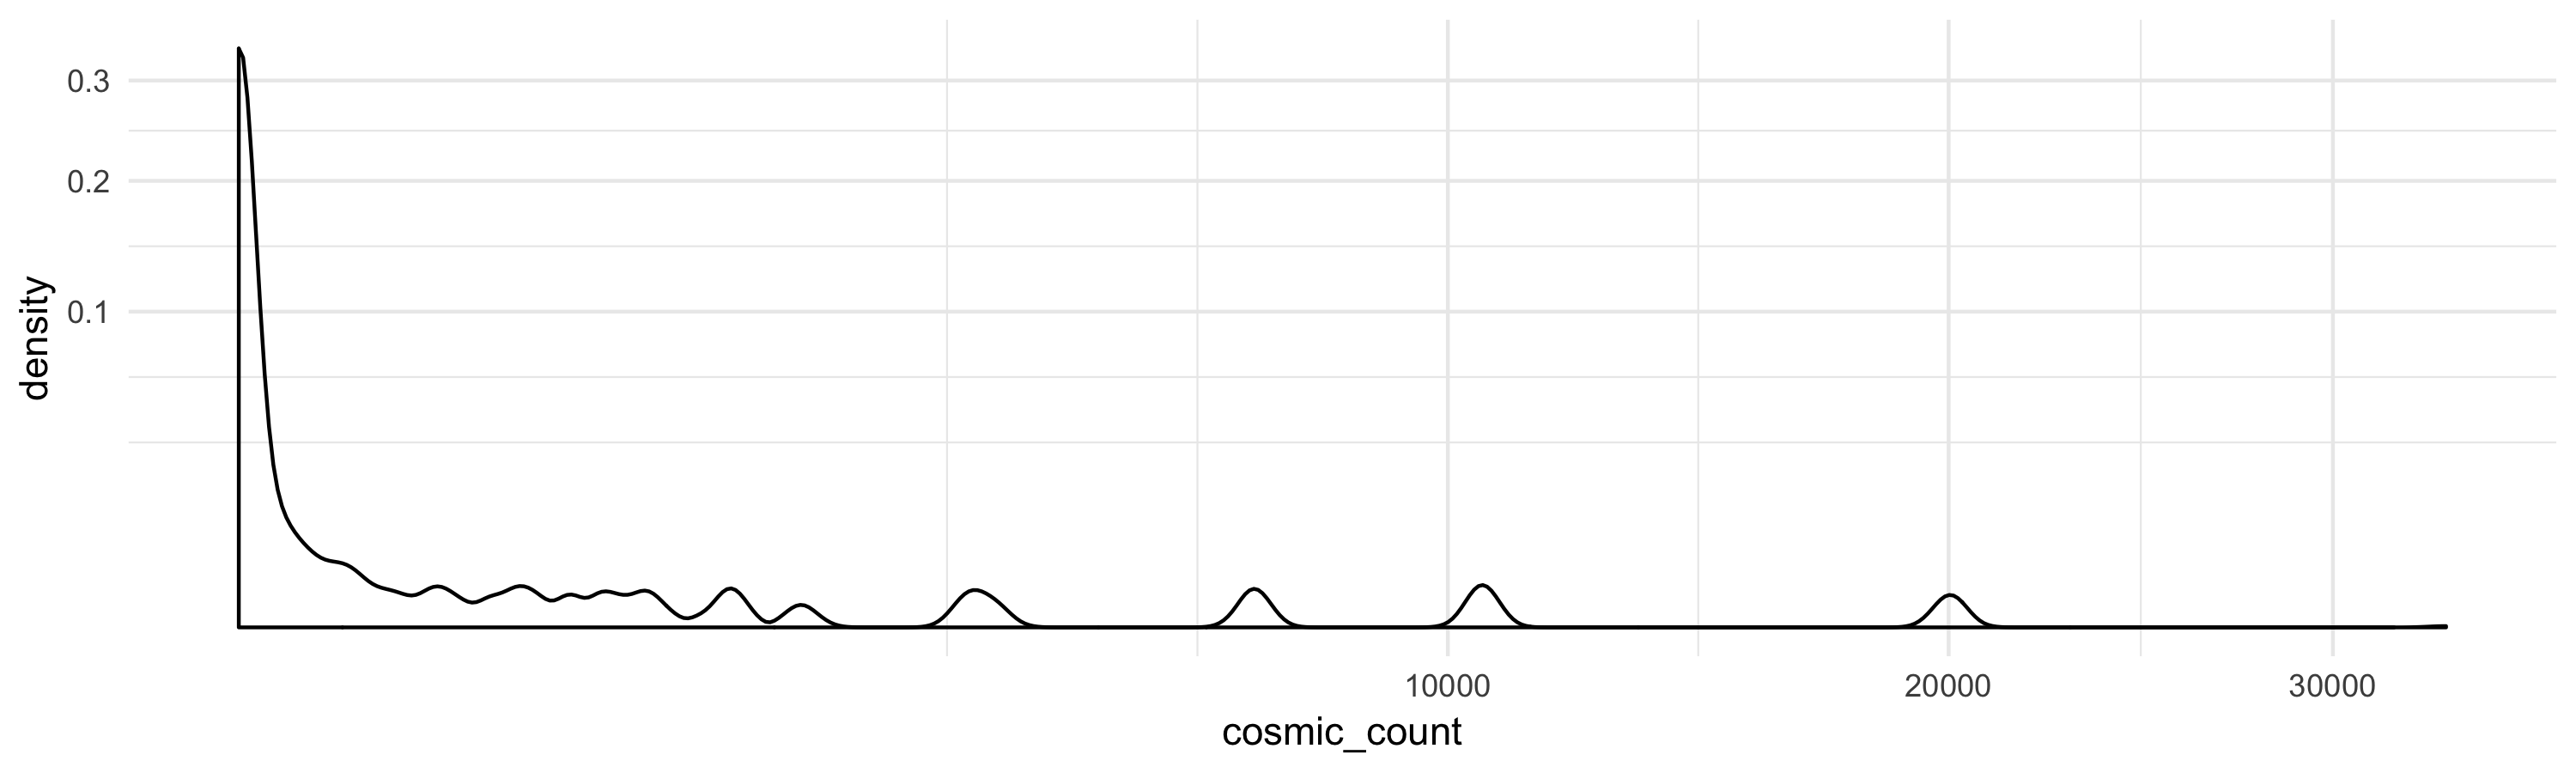

In [73]:
summary(impact$cosmic_count)
notebook_plot_size(10, 3)
ggplot(impact) + geom_density(aes(cosmic_count)) + scale_x_sqrt() + scale_y_sqrt()

## OncoKB annotations

Get the `is_a_hotspot`,`is_a_3d_hotspot` and `oncogenic` features from `selected_IMPACT_mutations_180508_oncokb_annotator.txt` (impact annotated by Pierre with oncokb-annotator, see ...).

### Get the raw data

In [74]:
impact_oncokb <- read.table("data/selected_IMPACT_mutations_180508_oncokb_annotator.txt",
                             sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [75]:
ncol(impact_oncokb)
nrow(impact_oncokb)
head(impact_oncokb)

[1] 38

[1] 248502

X,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,⋯,is.a.3d.hotspot,oncogenic,LEVEL_1,LEVEL_2A,LEVEL_2B,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,Highest_level
1,TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,⋯,,Oncogenic,NA,NA,,NA,,,NA,
2,ARID1A,1,27101572,27101572,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,⋯,,,NA,NA,,NA,,,NA,
3,PTPRS,19,5244030,5244030,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,⋯,,,NA,NA,,NA,,,NA,
4,PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,⋯,,,NA,NA,,NA,,,NA,
5,ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,⋯,,,NA,NA,,NA,,,NA,
6,PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,⋯,,,NA,NA,,NA,,,NA,


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a unique key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_oncokb`. The keys will be `mut_key` for both dataset, and are already created.

In [76]:
# The features `oncogenic`, `is.a.hotspot`, and `is.a.3d.hotspot` are unique for each `mut_key`
nrow(impact_oncokb %>% group_by(mut_key) %>%
                                filter(length(unique(is.a.hotspot)) > 1 |
                                       length(unique(is.a.3d.hotspot)) > 1 |
                                       length(unique(oncogenic)) > 1))
weird <- impact_oncokb %>% group_by(mut_key) %>%
                                filter(length(unique(is.a.hotspot)) > 1 |
                                       length(unique(is.a.3d.hotspot)) > 1 |
                                       length(unique(oncogenic)) > 1)
impact_oncokb <- unique(impact_oncokb[, c("mut_key", "is.a.hotspot", "is.a.3d.hotspot", "oncogenic")])
head(impact_oncokb, 4)

[1] 15

mut_key,is.a.hotspot,is.a.3d.hotspot,oncogenic
17_7577515_T_G,,,Oncogenic
1_27101572_C_G,,,
19_5244030_C_G,,,
1_46521514_G_C,,,


In [77]:
weird[order(weird$mut_key),][,c("Hugo_Symbol", "Consequence", "Variant_Type", "Reference_Allele", "Tumor_Seq_Allele2",
                               "cDNA_change", "HGVSp_Short", "is.a.hotspot", "is.a.3d.hotspot", "oncogenic", "mut_key")]

Hugo_Symbol,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,cDNA_change,HGVSp_Short,is.a.hotspot,is.a.3d.hotspot,oncogenic,mut_key
NOTCH1,splicing,SNP,C,T,c.4015-1G>A,,,,,9_139400334_C_T
NOTCH1,splicing,SNP,C,T,c.4015-1G>A,,,,,9_139400334_C_T
NOTCH1,splicing,SNP,C,T,c.4015-1G>A,p.X1339_splice,,,Oncogenic,9_139400334_C_T
NOTCH1,splicing,SNP,C,T,c.1441+1G>A,,,,,9_139412203_C_T
NOTCH1,splicing,SNP,C,T,c.1441+1G>A,,,,,9_139412203_C_T
NOTCH1,splicing,SNP,C,T,c.1441+1G>A,p.X481_splice,,,Oncogenic,9_139412203_C_T
EIF1AX,splicing,SNP,C,T,c.338-1G>A,,,,,X_20148726_C_T
EIF1AX,splicing,SNP,C,T,c.338-1G>A,,,,,X_20148726_C_T
EIF1AX,splicing,SNP,C,T,c.338-1G>A,p.X113_splice,,,Oncogenic,X_20148726_C_T
EIF1AX,splicing,SNP,T,A,c.338-2A>T,,,,,X_20148727_T_A


In [78]:
impact_oncokb <- impact_oncokb %>% group_by(mut_key) %>%
                                   filter(length(unique(is.a.hotspot)) == 1 &
                                          length(unique(is.a.3d.hotspot)) == 1 &
                                          length(unique(oncogenic)) == 1)

In [79]:
# Every impact mut_key has a join_key analoguous in impact_annotated
nrow(impact[! impact$mut_key %in% impact_oncokb$mut_key,])

[1] 15

In [80]:
impact[, c("is_a_hotspot",
           "is_a_3d_hotspot",
           "oncogenic")] <- left_join(impact, impact_oncokb,
                                      by = c("mut_key" = "mut_key"))[, c("is.a.hotspot",
                                                                         "is.a.3d.hotspot",
                                                                         "oncogenic")]

### `is_a_hotspot`

In [81]:
impact$is_a_hotspot[impact$is_a_hotspot == "Y"  ] <- "yes"
impact$is_a_hotspot[impact$is_a_hotspot != "yes"] <- "unknown"
table(impact$is_a_hotspot)


unknown     yes 
 223099   25388 

### `is_a_3d_hotspot`

In [82]:
impact$is_a_3d_hotspot[impact$is_a_3d_hotspot == "Y"  ] <- "yes"
impact$is_a_3d_hotspot[impact$is_a_3d_hotspot != "yes"] <- "unknown"
table(impact$is_a_3d_hotspot)


unknown     yes 
 233368   15119 

### `oncogenic`

In [83]:
impact$oncogenic[impact$oncogenic == ""] <- "Unknown"
table(impact$oncogenic)


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                524                 384               47613               16232 
Predicted Oncogenic             Unknown 
               2848              180886 

### Before

In [90]:
add_oncogenicity <- function(impact) {
    # Get the raw OncoKB data
    oncokb <- read.table("data/allAnnotatedVariants.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

    # Create keys to link the two dataframes
    oncokb$key <- paste0(oncokb$Gene, '.p.',oncokb$Alteration) # create the oncokb `key`
    # create the impact `oncokb_key`
    impact$oncokb_key <- paste0(impact$Hugo_Symbol, '.', impact$HGVSp_Short)

    impact$oncokb_key[impact$Consequence == "splicing" | impact$HGVSp_Short == ''] <- 'other'
    is_truncating <- which(impact$Consequence %in% c("frameshift_deletion", "frameshift_insertion",
                                                     "stopgain_SNV", "splicing"))
    impact$oncokb_key[is_truncating] <- paste0(impact$Hugo_Symbol[is_truncating], '.p.Truncating Mutations')

    # join the dataframes on the key and keep only the oncogenicity feature
    in_oncokb <- which(impact$oncokb_key %in% oncokb$key)
    impact$oncogenicity <- "not_in_oncokb"
    impact$oncogenicity[in_oncokb] <- left_join(impact[in_oncokb,], oncokb,
                                                by = c("oncokb_key" = "key"))$Oncogenicity

    # remove the oncokb_key
    impact$oncokb_key <- NULL
    
    return (impact)
}

In [91]:
impact <- add_oncogenicity(impact)

In [92]:
table(impact$oncogenicity)


    Inconclusive   Likely Neutral Likely Oncogenic    not_in_oncokb 
             526              235            43344           190377 
       Oncogenic 
           14020 

In [108]:
impact$oncogenicity[impact$oncogenicity == "not_in_oncokb"] <- "Unknown"
impact$oncogenic[impact$oncogenic == "Predicted Oncogenic"] <- "Likely Oncogenic"
table(impact$oncogenicity == impact$oncogenic)
diff <- impact[impact$oncogenicity != impact$oncogenic,]
head(diff[diff$oncogenicity != "Unknown",])


 FALSE   TRUE 
  9658 238829 

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,⋯,confidence_class,sample_coverage,mut_key,frequency_in_normals,Kaviar_AF,cosmic_count,is_a_hotspot,is_a_3d_hotspot,oncogenic,oncogenicity
351,PTEN,10,89692904,89692904,stopgain_SNV,SNP,C,T,P-0000129-T01-IM3,c.388C>T,⋯,AUTO_OK,940,10_89692904_C_T,0,6.5e-06,72,unknown,unknown,Oncogenic,Likely Oncogenic
1940,EIF1AX,X,20156740,20156740,nonsynonymous_SNV,SNP,C,T,P-0000477-T01-IM3,c.17G>A,⋯,AUTO_OK,753,X_20156740_C_T,0,0.0e+00,1,yes,unknown,Likely Oncogenic,Inconclusive
4270,PTEN,10,89692904,89692904,stopgain_SNV,SNP,C,T,P-0000759-T01-IM3,c.388C>T,⋯,AUTO_OK,520,10_89692904_C_T,0,6.5e-06,72,unknown,unknown,Oncogenic,Likely Oncogenic
4756,PTEN,10,89692904,89692904,stopgain_SNV,SNP,C,T,P-0000826-T01-IM3,c.388C>T,⋯,AUTO_OK,433,10_89692904_C_T,0,6.5e-06,72,unknown,unknown,Oncogenic,Likely Oncogenic
9398,TP63,3,189587118,189587118,nonsynonymous_SNV,SNP,C,T,P-0001485-T01-IM3,c.1135C>T,⋯,AUTO_OK,569,3_189587118_C_T,0,6.5e-06,2,yes,unknown,Likely Oncogenic,Inconclusive
10052,PTEN,10,89692904,89692904,stopgain_SNV,SNP,C,T,P-0001598-T01-IM3,c.388C>T,⋯,AUTO_OK,1149,10_89692904_C_T,0,6.5e-06,72,unknown,unknown,Oncogenic,Likely Oncogenic


## CancerGenesList

Get the `gene_type` feature from `CancerGenesList.txt` (...).

### Get the raw data

In [32]:
cancer_genes_list <- read.table("data/CancerGenesList.txt",
                                sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment.char = '')

In [33]:
ncol(cancer_genes_list)
nrow(cancer_genes_list)
head(cancer_genes_list)

[1] 11

[1] 1019

Hugo.Symbol,X..of.occurence.within.resources,OncoKB.Annotated,OncoKB.Oncogene,OncoKB.TSG,MSK.IMPACT,MSK.HEME,Foundation.One,Foundation.One.Heme,Vogelstein,Sanger.CGC
ABL1,7,Yes,Yes,,Yes,Yes,Yes,Yes,Yes,Yes
ABL2,3,No,,,No,No,Yes,Yes,No,Yes
ACTB,1,No,,,No,No,No,Yes,No,No
ACTG1,1,No,,,No,Yes,No,No,No,No
ACVR1,3,Yes,Yes,,Yes,No,No,No,No,Yes
ACVR1B,2,No,,,No,No,Yes,No,Yes,No


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a unique key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `cancer_genes_list`. The keys will be: 
* `Hugo_Symbol` for `impact`
* `Hugo.Symbol` for `impact_annotated`

In [34]:
# The feature `OncoKB.Oncogene` and `OncoKB.TSG` are unique for each key
nrow(cancer_genes_list %>% group_by(Hugo.Symbol) %>% filter(length(unique(OncoKB.Oncogene)) > 1 |
                                                            length(unique(OncoKB.TSG)) > 1))
cancer_genes_list <- unique(cancer_genes_list[, c("Hugo.Symbol", "OncoKB.Oncogene", "OncoKB.TSG")])
head(cancer_genes_list, 4)

[1] 0

Hugo.Symbol,OncoKB.Oncogene,OncoKB.TSG
ABL1,Yes,
ABL2,,
ACTB,,
ACTG1,,


In [55]:
# Every impact Hugo_Symbol has a Hugo.Symbol analoguous in impact_annotated
length(unique(impact$Hugo_Symbol[! impact$Hugo_Symbol %in% cancer_genes_list$Hugo.Symbol]))
unique(impact$Hugo_Symbol[! impact$Hugo_Symbol %in% cancer_genes_list$Hugo.Symbol])

[1] 16

[1] "PAK5"         "COP1"         "TENT5C"       "MRE11"        "CDKN2Ap14ARF"
 [6] "PRKN"         "ABRAXAS1"     "RFFL"         "INSRR"        "TIMM8B"      
[11] "OBSL1"        "ELOC"         "SDCCAG8"      "NSD2"         "NSD3"        
[16] "CCNQ"

In [36]:
impact[, c("OncoKB.Oncogene", "OncoKB.TSG")] <- left_join(impact, cancer_genes_list,
                                      by = c("Hugo_Symbol" = "Hugo.Symbol"))[,c("OncoKB.Oncogene", "OncoKB.TSG")]

In [37]:
head(impact)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,⋯,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,frequency_in_normals,OncoKB.Oncogene,OncoKB.TSG
TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,⋯,59,54,58,56,AUTO_OK,344,17_7577515_T_G,0,,Yes
ARID1A,1,27101572,27101572,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.4854C>G,⋯,126,129,11,11,UNKNOWN,344,1_27101572_C_G,0,,Yes
PTPRS,19,5244030,5244030,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.1452G>C,⋯,97,87,61,52,UNKNOWN,344,19_5244030_C_G,0,,
PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,⋯,288,316,61,68,AUTO_OK,428,1_46521514_G_C,0,,Yes
ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,⋯,221,177,46,38,AUTO_OK,428,3_142178126_C_A,0,,Yes
PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,⋯,252,202,66,50,AUTO_OK,428,4_55139732_T_A,0,Yes,


### `gene_type`

In [41]:
head(unique(impact$OncoKB.Oncogene))
head(unique(impact$OncoKB.TSG))

[1] ""    "Yes" NA

[1] "Yes" ""    NA

In [42]:
impact$gene_type <- "unknown"
impact$gene_type[impact$OncoKB.Oncogene == "Yes"] <- "oncogene"
impact$gene_type[impact$OncoKB.TSG == "Yes"]      <- "tsg"

impact$OncoKB.Oncogene <- NULL
impact$OncoKB.TSG      <- NULL

In [43]:
table(impact$gene_type)


oncogene      tsg  unknown 
   63112   105532    79858 

## Resume of the operations needed to get the additional features

The following function `add_features()` adds the wanted feature to `impact` as done it the precedent sections, it will be added to `custom_tools.R`, as well as the `get_cosmic_count()` function created to parse `cosmic70`.

In [46]:
add_features <- function(impact, annotations = FALSE, oncokb = FALSE, gene_type = FALSE) {
    
    if (annotations) {
        # 1. Get the raw data
        impact_annotated <- read.table("data/all_IMPACT_mutations_180508.simple.hg19_multianno.txt",
                                       sep = "\t", stringsAsFactors = FALSE, header = TRUE)


        # 2. Create keys to join the two dataframes and extract the features
        impact_annotated$join_key <- paste(impact_annotated$Chr,
                                   impact_annotated$Start,
                                   impact_annotated$Ref,
                                   impact_annotated$Alt,
                                   sep = '_')
        impact_annotated <- unique(impact_annotated[, c("join_key", "Kaviar_AF", "cosmic70")])
        impact[, c("Kaviar_AF", "cosmic70")] <- left_join(impact,
                                                  impact_annotated,
                                                  by = c("mut_key" = "join_key"))[, c("Kaviar_AF", "cosmic70")]


        # 3. Process the raw features
        ## Kaviar_AF
        impact$Kaviar_AF[(impact$Kaviar_AF == '.')] <- list('0')
        impact$Kaviar_AF <- sapply(impact$Kaviar_AF, function(s) as.double(s))

        ## cosmic_count
        impact$cosmic70[(impact$cosmic70 == '.')] <- list('OCCURENCE=0')
        impact$cosmic_count <- sapply(impact$cosmic70, get_cosmic_count)
        impact$cosmic70 <- NULL
    }
                                   
    if(oncokb) {
        # 1. Get the raw data
        impact_oncokb <- read.table("data/selected_IMPACT_mutations_180508_oncokb_annotator.txt",
                                    sep = "\t", stringsAsFactors = FALSE, header = TRUE)


        # 2. Create keys to join the two dataframes and extract the features
        impact_oncokb <- unique(impact_oncokb[, c("mut_key", "is.a.hotspot", "is.a.3d.hotspot", "oncogenic")])
        impact[, c("is_a_hotspot", "is_a_3d_hotspot", "oncogenic")] <- left_join(impact, impact_oncokb,
                                                                                 by = c("mut_key" = "mut_key"))[, c("is.a.hotspot",
                                                                                                                    "is.a.3d.hotspot",
                                                                                                                    "oncogenic")]


        # 3. Process the raw features
        ## is_a_hostpot
        impact$is_a_hotspot[impact$is_a_hotspot == "Y"  ] <- "yes"
        impact$is_a_hotspot[impact$is_a_hotspot != "yes"] <- "unknown"

        ## is_a_3d_hostpot
        impact$is_a_3d_hotspot[impact$is_a_3d_hotspot == "Y"  ] <- "yes"
        impact$is_a_3d_hotspot[impact$is_a_3d_hotspot != "yes"] <- "unknown"

        ## oncogenic
        impact$oncogenic[impact$oncogenic == ""] <- "Unknown"
    }

    if(gene_type) {
        # 1. Get the raw data
        cancer_genes_list <- read.table("data/CancerGenesList.txt",
                                        sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment.char = '')


        # 2. Create keys to join the two dataframes and extract the features
        impact[, c("OncoKB.Oncogene", "OncoKB.TSG")] <- left_join(impact, cancer_genes_list, 
                                                                  by = c("Hugo_Symbol" = "Hugo.Symbol"))[,c("OncoKB.Oncogene", "OncoKB.TSG")]


        # 3. Process the raw features
        ## gene_type
        impact$gene_type <- "unknown"
        impact$gene_type[impact$OncoKB.Oncogene == "Yes"] <- "oncogene"
        impact$gene_type[impact$OncoKB.TSG == "Yes"]      <- "tsg"

        impact$OncoKB.Oncogene <- NULL
        impact$OncoKB.TSG      <- NULL
    }
                               
    return (impact)
}

In [47]:
impact <- get_cleaned_impact()
impact <- add_features(impact, annotations = TRUE, oncokb = TRUE, gene_type = TRUE)
ncol(impact)
nrow(impact)

Warning message in `[<-.data.frame`(`*tmp*`, , c("is_a_hotspot", "is_a_3d_hotspot", :
“replacement element 1 has 248517 rows to replace 248502 rows”Warning message in `[<-.data.frame`(`*tmp*`, , c("is_a_hotspot", "is_a_3d_hotspot", :
“replacement element 2 has 248517 rows to replace 248502 rows”Warning message in `[<-.data.frame`(`*tmp*`, , c("is_a_hotspot", "is_a_3d_hotspot", :
“replacement element 3 has 248517 rows to replace 248502 rows”

[1] 31

[1] 248502